<a href="https://colab.research.google.com/github/Nawaf-Aljalaud/EDA-Riyadh-Restaurants-Dataset/blob/main/PROJECT3_SDAIA_T5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Course End Project: Data Analysis Module Exploratory Data Analysis**
### BY: Nawaf Aljalaud and Abdullah Alsaedi
#### "SDAIA Bootcamp T5": Week3 / Project 3



# Task 1


## • Imports and Load the resturants dataset

In [99]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly
import plotly.express as px
import numpy as np
from pandas.io.json import json_normalize
import math

In [100]:
drive.mount('/content/drive')

resturants_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/py/riyadh_resturants_clean.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
resturants_df

,name,categories,address,lat,lng,price,likes,photos,tips,rating,ratingSignals
0,مطعم وقت الشواية,Afghan Restaurant,"الرياض 14723, المملكة العربية السعودية",24.518983,46.656981,Moderate,0.0,0,0,NaN,NaN
1,ديوانية عكاظ,Café,"الرياض 14726, المملكة العربية السعودية",24.518511,46.669149,Cheap,0.0,2,0,NaN,NaN
2,شاهي جمر راعي الجمس,Coffee Shop,"الرياض 14726, المملكة العربية السعودية",24.519314,46.670041,Cheap,0.0,0,0,NaN,NaN
3,غدير الشام,Afghan Restaurant,المملكة العربية السعودية,24.519520,46.671660,Moderate,0.0,0,0,NaN,NaN
4,Dunkin',Donut Shop,"الرياض, المملكة العربية السعودية",24.525001,46.433944,Cheap,29.0,90,1,8.9,32.0
...,...,...,...,...,...,...,...,...,...,...,...
19356,Tav restaurant,Halal Restaurant,المملكة العربية السعودية,24.939902,46.715187,NaN,0.0,0,0,NaN,NaN
19357,First Time,Coffee Shop,"الرياض 13455, المملكة العربية السعودية",24.942522,46.712326,Cheap,1.0,0,0,NaN,NaN
19358,شاورمو,Fast Food Restaurant,"الرياض, المملكة العربية السعودية",24.941936,46.712764,Cheap,0.0,2,0,NaN,NaN
19359,MammaRoti cafe,Café,"King khaled international airport, الرياض, الم...",24.942363,46.712423,Cheap,11.0,14,2,6.1,17.0


## •	Explore the structure of the resturants dataset

In [102]:
print(resturants_df.shape)
print(resturants_df.dtypes)

(19361, 11)
name              object
categories        object
address           object
lat              float64
lng              float64
price             object
likes            float64
photos             int64
tips               int64
rating           float64
ratingSignals    float64
dtype: object


In [103]:
resturants_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19361 entries, 0 to 19360
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           19361 non-null  object 
 1   categories     19361 non-null  object 
 2   address        19361 non-null  object 
 3   lat            19361 non-null  float64
 4   lng            19361 non-null  float64
 5   price          17846 non-null  object 
 6   likes          19359 non-null  float64
 7   photos         19361 non-null  int64  
 8   tips           19361 non-null  int64  
 9   rating         7949 non-null   float64
 10  ratingSignals  7949 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.6+ MB


## •	Examine the first and last few rows of resturants dataset

In [104]:
resturants_df.head()

,name,categories,address,lat,lng,price,likes,photos,tips,rating,ratingSignals
0,مطعم وقت الشواية,Afghan Restaurant,"الرياض 14723, المملكة العربية السعودية",24.518983,46.656981,Moderate,0.0,0,0,NaN,NaN
1,ديوانية عكاظ,Café,"الرياض 14726, المملكة العربية السعودية",24.518511,46.669149,Cheap,0.0,2,0,NaN,NaN
2,شاهي جمر راعي الجمس,Coffee Shop,"الرياض 14726, المملكة العربية السعودية",24.519314,46.670041,Cheap,0.0,0,0,NaN,NaN
3,غدير الشام,Afghan Restaurant,المملكة العربية السعودية,24.519520,46.671660,Moderate,0.0,0,0,NaN,NaN
4,Dunkin',Donut Shop,"الرياض, المملكة العربية السعودية",24.525001,46.433944,Cheap,29.0,90,1,8.9,32.0


In [105]:
resturants_df.tail()

,name,categories,address,lat,lng,price,likes,photos,tips,rating,ratingSignals
19356,Tav restaurant,Halal Restaurant,المملكة العربية السعودية,24.939902,46.715187,NaN,0.0,0,0,NaN,NaN
19357,First Time,Coffee Shop,"الرياض 13455, المملكة العربية السعودية",24.942522,46.712326,Cheap,1.0,0,0,NaN,NaN
19358,شاورمو,Fast Food Restaurant,"الرياض, المملكة العربية السعودية",24.941936,46.712764,Cheap,0.0,2,0,NaN,NaN
19359,MammaRoti cafe,Café,"King khaled international airport, الرياض, الم...",24.942363,46.712423,Cheap,11.0,14,2,6.1,17.0
19360,Klijaz Foodtruck كليجز فودترك,Food Truck,"الرياض 13316, المملكة العربية السعودية",24.939546,46.764950,Cheap,8.0,21,2,7.8,8.0


# Task 2

## •	Handle missing values of resturant dataset

In [106]:
resturants_df.isnull().sum()

name                 0
categories           0
address              0
lat                  0
lng                  0
price             1515
likes                2
photos               0
tips                 0
rating           11412
ratingSignals    11412
dtype: int64

In [107]:
resturants_df = resturants_df.dropna()

In [108]:
resturants_df.isnull().sum()

name             0
categories       0
address          0
lat              0
lng              0
price            0
likes            0
photos           0
tips             0
rating           0
ratingSignals    0
dtype: int64

## handle any duplicate of resturants dataset


In [109]:
resturants_df.drop_duplicates().sum()

name             Dunkin'Moroccan Taste (المذاق المغربي)كرك جديد...
categories       Donut ShopCaféCaféDonut Shop, Coffee ShopCoffe...
address          الرياض, المملكة العربية السعوديةMakkah Al Muka...
lat                                                  183248.592675
lng                                                  346004.926394
price            CheapCheapCheapCheapCheapModerateCheapCheapChe...
likes                                                    1163015.0
photos                                                     3056924
tips                                                        310273
rating                                                     55978.1
ratingSignals                                            1533998.0
dtype: object

In [110]:
resturants_df = resturants_df.drop_duplicates()

In [111]:
resturants_df

,name,categories,address,lat,lng,price,likes,photos,tips,rating,ratingSignals
4,Dunkin',Donut Shop,"الرياض, المملكة العربية السعودية",24.525001,46.433944,Cheap,29.0,90,1,8.9,32.0
5,Moroccan Taste (المذاق المغربي),Café,"Makkah Al Mukarramah Rd, الرياض, المملكة العرب...",24.524937,46.433539,Cheap,22.0,13,2,8.6,24.0
6,كرك جدي,Café,"الرياض, المملكة العربية السعودية",24.525068,46.434203,Cheap,24.0,27,1,7.3,33.0
7,دانكن دونت طريق المزاحميه,"Donut Shop, Coffee Shop","الرياض, المملكة العربية السعودية",24.524959,46.433641,Cheap,0.0,6,0,8.3,0.0
13,Starbucks,Coffee Shop,"الرياض 14723, المملكة العربية السعودية",24.522543,46.648867,Cheap,1.0,16,0,8.1,1.0
...,...,...,...,...,...,...,...,...,...,...,...
19350,Upper Crust,Sandwich Place,"الرياض, المملكة العربية السعودية",24.942419,46.712104,Cheap,8.0,31,6,5.3,22.0
19353,Java Time,Coffee Shop,"King Khalid International Airport (RUH), الريا...",24.942480,46.712140,Cheap,5.0,6,2,7.5,8.0
19354,Upper Crust- KKIA “Riyadh Airport”,Café,"King Khalid International Airport, الرياض, الم...",24.942339,46.712199,Cheap,7.0,15,8,5.1,19.0
19359,MammaRoti cafe,Café,"King khaled international airport, الرياض, الم...",24.942363,46.712423,Cheap,11.0,14,2,6.1,17.0


## Convert categorical variables into the appropriate data type if necessary

In [112]:
resturants_df['likes'] = resturants_df['likes'].astype('int')

<ipython-input-112-3b1c756030ab>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [113]:
resturants_df

,name,categories,address,lat,lng,price,likes,photos,tips,rating,ratingSignals
4,Dunkin',Donut Shop,"الرياض, المملكة العربية السعودية",24.525001,46.433944,Cheap,29,90,1,8.9,32.0
5,Moroccan Taste (المذاق المغربي),Café,"Makkah Al Mukarramah Rd, الرياض, المملكة العرب...",24.524937,46.433539,Cheap,22,13,2,8.6,24.0
6,كرك جدي,Café,"الرياض, المملكة العربية السعودية",24.525068,46.434203,Cheap,24,27,1,7.3,33.0
7,دانكن دونت طريق المزاحميه,"Donut Shop, Coffee Shop","الرياض, المملكة العربية السعودية",24.524959,46.433641,Cheap,0,6,0,8.3,0.0
13,Starbucks,Coffee Shop,"الرياض 14723, المملكة العربية السعودية",24.522543,46.648867,Cheap,1,16,0,8.1,1.0
...,...,...,...,...,...,...,...,...,...,...,...
19350,Upper Crust,Sandwich Place,"الرياض, المملكة العربية السعودية",24.942419,46.712104,Cheap,8,31,6,5.3,22.0
19353,Java Time,Coffee Shop,"King Khalid International Airport (RUH), الريا...",24.942480,46.712140,Cheap,5,6,2,7.5,8.0
19354,Upper Crust- KKIA “Riyadh Airport”,Café,"King Khalid International Airport, الرياض, الم...",24.942339,46.712199,Cheap,7,15,8,5.1,19.0
19359,MammaRoti cafe,Café,"King khaled international airport, الرياض, الم...",24.942363,46.712423,Cheap,11,14,2,6.1,17.0


# Task 3

## Conduct univariate analysis to understand the distribution of individual variables

<ipython-input-114-2786715db309>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='rating', ylabel='Density'>

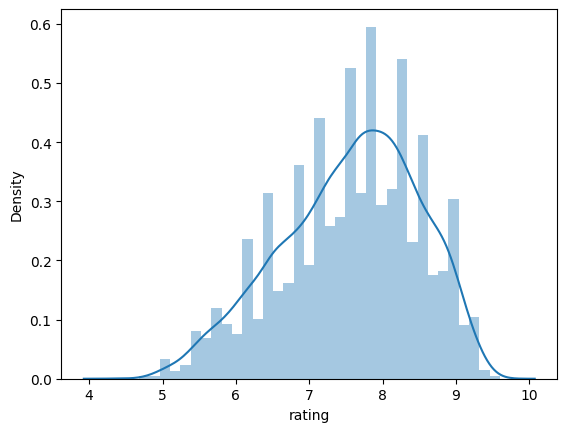

In [114]:
sns.distplot(resturants_df['rating'])

This plot is a histogram with a kernel density estimate (KDE) on top. This type of plot is created using the seaborn distplot function.

The histogram represents the distribution of restaurant ratings. Each bar in the histogram represents a range of ratings, and the height of the bar represents the number of restaurants that fall into that range.

## Perform bivariate analysis to explore relationships between variables

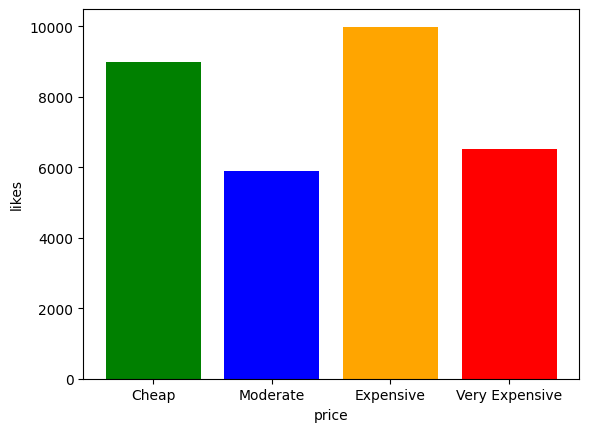

In [143]:
color_dict = {'Cheap': 'green', 'Moderate': 'blue', 'Expensive': 'orange', 'Very Expensive': 'red'}

colors = resturants_df['price'].map(color_dict)

plt.bar(resturants_df['price'], resturants_df['likes'], color=colors, align='center')
plt.xlabel('price')
plt.ylabel('rating')
plt.show()


This plot is a bar plot created using the matplotlib library. This plot is showing the relationship between the price of the restaurants and the number of likes they have received.

Each bar in the plot represents restaurants with thier price category. The x-coordinate of the bar corresponds to the price of the restaurant, and the height of the bar corresponds to the number of likes that restaurant has received.

This plot is useful for understanding how the price of a restaurant affects its popularity, as measured by the number of likes.

## •	Calculate summary statistics for relevant variables.

In [116]:
print(resturants_df.describe())

               lat          lng        likes        photos         tips  \
count  7410.000000  7410.000000  7410.000000   7410.000000  7410.000000   
mean     24.729905    46.694322   156.952092    412.540351    41.872200   
std       0.075711     0.067337   447.158867   1508.256820   115.776148   
min      24.469683    46.272777     0.000000      0.000000     0.000000   
25%      24.687989    46.647591    10.000000     10.000000     2.000000   
50%      24.742142    46.688745    27.000000     34.000000     7.000000   
75%      24.784291    46.744334   109.000000    158.750000    27.000000   
max      24.943310    46.940053  9984.000000  25811.000000  2301.000000   

            rating  ratingSignals  
count  7410.000000    7410.000000  
mean      7.554399     207.017274  
std       0.936075     563.087622  
min       4.400000       0.000000  
25%       6.900000      14.000000  
50%       7.700000      38.000000  
75%       8.300000     147.750000  
max       9.600000   12376.000000  


# Task 4

## •	Create new features that might be useful for analysis

In [117]:
resturants_df['location'] = list(zip(resturants_df['lat'], resturants_df['lng']))

In [118]:
resturants_df.sample()

,name,categories,address,lat,lng,price,likes,photos,tips,rating,ratingSignals,location
10349,Cactus cafe,"Coffee Shop, Café, Breakfast Spot","الرياض 14242, المملكة العربية السعودية",24.744815,46.846013,Cheap,10,30,3,8.1,12.0,"(24.744815, 46.846013)"


In [119]:
unique_prices = resturants_df['price'].unique()
unique_prices

array(['Cheap', 'Moderate', 'Expensive', 'Very Expensive'], dtype=object)

## •	Encode categorical variables if necessary

## apply manual encoding

In [120]:
price_mapping = {'Cheap': 0, 'Moderate': 1, 'Expensive': 2, 'Very Expensive': 3}

resturants_df['price_encoded'] = resturants_df['price'].map(price_mapping)

This code is changing words about price (‘Cheap’, ‘Moderate’, etc.) into numbers (0, 1, etc.) in a new column called price_encoded. This makes the data easier to analyze.

 This numerical representation could then be used in a variety of machine learning applications, such as predicting the number of likes a restaurant will get based on its price category.

In [121]:
resturants_df.sample()

,name,categories,address,lat,lng,price,likes,photos,tips,rating,ratingSignals,location,price_encoded
7374,Maestro Pizza (مايسترو بيتزا),Pizza Place,"Alrabwa | الربوة (E Ring Rd), الرياض, المملكة ...",24.705578,46.76726,Moderate,116,23,27,7.6,162.0,"(24.70557829971775, 46.76725988183194)",1


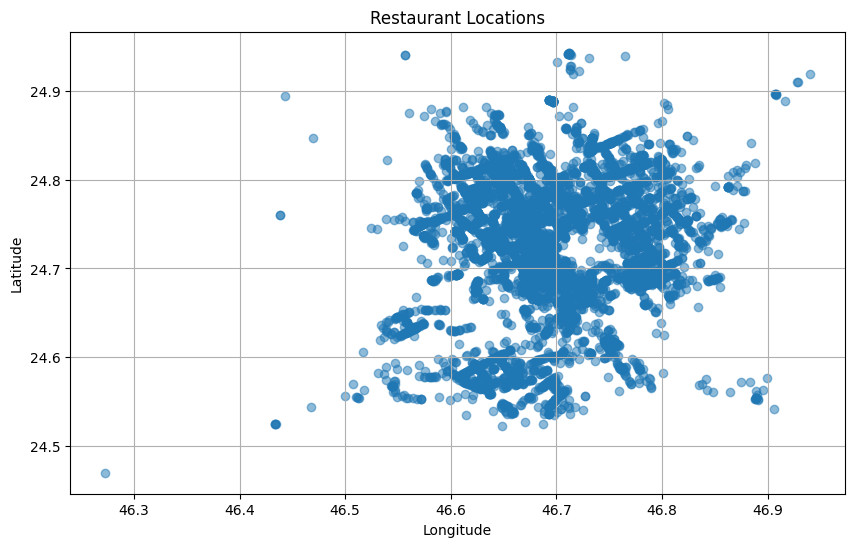

In [122]:
plt.figure(figsize=(10, 6))
plt.scatter(resturants_df['lng'], resturants_df['lat'], alpha=0.5)
plt.title('Restaurant Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

We use this code of sactter plot to show the density of restaurants in each location of Riyadh map.

In [130]:
p1 = {'lat': 24.719462, 'lon': 46.719108} # center point map
color_discrete_map = {'Cheap': 'green', 'Moderate': 'blue', 'Expensive': 'orange', 'Very Expensive': 'red'}
fig = px.scatter_mapbox(resturants_df,
                        lat=resturants_df['lat'],
                        lon=resturants_df['lng'],
                        center=p1,
                        color=resturants_df['price'],
                        color_discrete_map=color_discrete_map,
                        zoom=9,
                        mapbox_style="open-street-map",
                        title='Riyadh Restaurants'
                       )
fig.show()

this code show a map of Riyadh with points representing restaurants, and the color of each point indicates the price category of the restaurant.

The colors for each price category indecates of:
 ‘Cheap’ restaurants will be green, ‘Moderate’ restaurants will be blue, ‘Expensive’ restaurants will be orange, and ‘Very Expensive’ restaurants will be red.

<ipython-input-124-9ab4df44f722>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




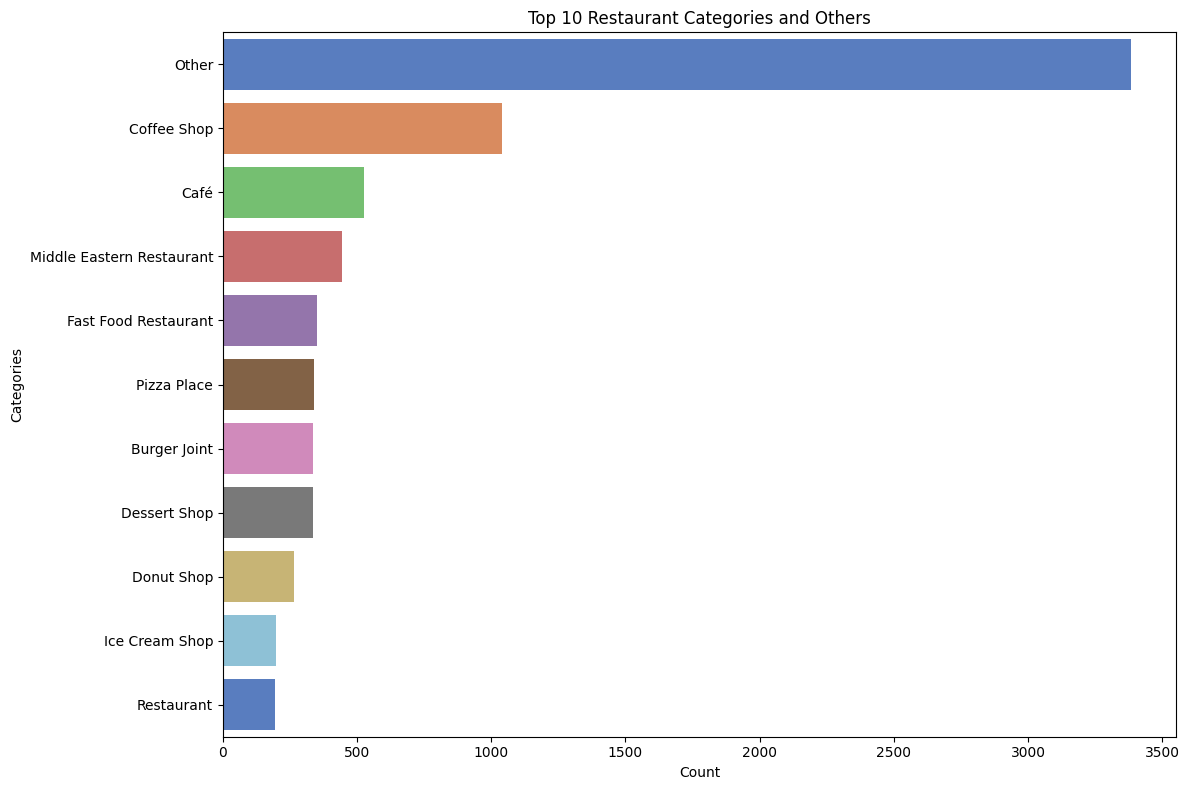

In [124]:
top_n = 10

category_counts = resturants_df['categories'].value_counts()

top_categories = category_counts[:top_n].index.tolist()

resturants_df['Top_Categories'] = resturants_df['categories'].apply(lambda x: x if x in top_categories else 'Other')

plt.figure(figsize=(12, 8))
sns.countplot(data=resturants_df, y='Top_Categories', order=resturants_df['Top_Categories'].value_counts().index, palette='muted')
plt.title(f'Top {top_n} Restaurant Categories and Others')
plt.xlabel('Count')
plt.ylabel('Categories')
plt.tight_layout()
plt.show()

This code above shows the top 10 categories in Riyadh.

In [125]:
category_counts = resturants_df['categories'].value_counts()

print(category_counts)

Coffee Shop                                       1041
Café                                               527
Middle Eastern Restaurant                          442
Fast Food Restaurant                               352
Pizza Place                                        341
                                                  ... 
Diner, Steakhouse                                    1
Snack Place, Middle Eastern Restaurant               1
Buffet, Breakfast Spot                               1
Café, Breakfast Spot                                 1
Burger Joint, Fast Food Restaurant, Food Court       1
Name: categories, Length: 650, dtype: int64


As we see here there are multiple categoreis and its somewhat complicated, we will make it into two category to simplify it.

In [126]:
coffee_related = ['Coffee', 'Café', 'Donut', 'Bakery', 'Dessert', 'Juice','Ice Cream', 'Lounge' , 'Tea']

def categorize_restaurant(category):
    if any(item in category for item in coffee_related):
        return 'Coffee_related'
    else:
        return 'Restaurant'

resturants_df['categories_combined'] = resturants_df['categories'].apply(categorize_restaurant)


In this code function we combine the very multi categories into just two categories ( Resturants / Coffee_realted ) to see what is the most common category in riyadh.

In [127]:
resturants_df.sample(5)

,name,categories,address,lat,lng,price,likes,photos,tips,rating,ratingSignals,location,price_encoded,Top_Categories,categories_combined
4356,Alkhafif (عالخفيف),"Breakfast Spot, Sandwich Place","King Fahad Rd, Riyadh, الرياض, المملكة العربية...",24.662748,46.700898,Cheap,60,45,18,7.5,82.0,"(24.66274769475497, 46.70089793788079)",0,Other,Restaurant
10710,مطعم وكافيه قوز Gos Lounge,"Lounge, Restaurant","الرياض 13213, المملكة العربية السعودية",24.749436,46.764411,Expensive,43,286,24,7.2,65.0,"(24.749436, 46.764411)",2,Other,Coffee_related
5126,Baba Sweets,Dessert Shop,المملكة العربية السعودية,24.678975,46.708620,Cheap,89,19,22,8.1,120.0,"(24.678974950596967, 46.7086201169402)",0,Dessert Shop,Coffee_related
10413,Coffee Day,Coffee Shop,"محطة زيتي (طريق صلبوخ), الرياض, المملكة العربي...",24.747443,46.585505,Cheap,126,13,5,8.3,156.0,"(24.747443258951165, 46.585504887220594)",0,Coffee Shop,Coffee_related
10547,ملتقى الحلويات,Snack Place,"الرياض, المملكة العربية السعودية",24.748028,46.664246,Cheap,69,21,11,8.9,79.0,"(24.748027727600807, 46.664246127891815)",0,Other,Restaurant


In [128]:
resturants_df['categories_combined'].value_counts()

Restaurant        3756
Coffee_related    3654
Name: categories_combined, dtype: int64

In [129]:
p1 = {'lat': 24.719462, 'lon': 46.719108} # center point map

fig = px.scatter_mapbox(resturants_df,
                        lat=resturants_df['lat'],
                        lon=resturants_df['lng'],
                        center=p1,
                        color=resturants_df['categories_combined'],
                        zoom=9,
                        mapbox_style="open-street-map",
                        title='Riyadh Restaurants Category'
                       )
fig.show()


This map shows the distribution of coffee related and Resturants in Riyadh